# Window Functions 


In the previous module, you learnt how to order employees by their salary in an example data set using group by & limits. One method to do this would be to categorise them by their values. For example, you can divide them into the following categories:

Employees earning less than ₹2,50,000 per year
Employees earning greater than or equal to ₹2,50,000 per year


The first category of employees would be exempted from paying any tax and need not go through some of the additional checks that the second category of employees would be required to go through. You can solve this problem statement using a filter condition in a 'where' clause.



Now, imagine you are working in a bank and need to identify and classify your customers on the following criteria:

* Top 10% of customers: Platinum
* Next 10% of customers: Gold
* Next 20% of customer: Silver
* Rest of the customers: Regular


Your bank intends to roll out different schemes for these classes of customers in exchange for their loyalty. But how do you solve such a seemingly complex problem statement? You will find the answer to this question in the upcoming sessions.


In this session

You will be introduced to the concept of windowing functions. You will learn about the **'over'** and **'partition'** clauses used to implement windowing. After going through this session, you should be able to use window functions such as **rank()**, **dense_rank()** and **percent_rank()** in your queries.

You will also be introduced to the concept of **named windows**. You will learn about **frames** and how they move within a window. Next, you will learn about the various applications of windowing, including one to calculate an element known as a **moving average**. Finally, you will learn about the **'lead'** and **'lag'** functions that are used to fetch data from succeeding and preceding rows, respectively.

## Rank Functions 

* **RANK():** Rank of the current row within its partition, with gaps
* **DENSE_RANK():** Rank of the current row within its partition, without gaps
* **PERCENT_RANK():** Percentage rank value, which always lies between 0 and 1

### rank()


    Syntax 
    
    RANK() OVER (
    
    PARTITION BY [{,...}]
    
    ORDER BY  [ASC|DESC], [{,...}]
    
    )

 **Create Table** 

    -- Create the table
    CREATE TABLE sales (
        id INT PRIMARY KEY,
        employee VARCHAR(50),
        department VARCHAR(10),
        amount DECIMAL(10, 2),
        sale_date DATE
    );
    
    -- Insert the data
    INSERT INTO sales (id, employee, department, amount, sale_date) VALUES
    (1, 'Alice', 'A', 100, '2023-01-01'),
    (2, 'Bob', 'A', 200, '2023-01-02'),
    (3, 'Carol', 'B', 300, '2023-01-01'),
    (4, 'Alice', 'A', 400, '2023-01-03'),
    (5, 'Bob', 'A', 100, '2023-01-04'),
    (6, 'Carol', 'B', 500, '2023-01-02');







**Example1:**

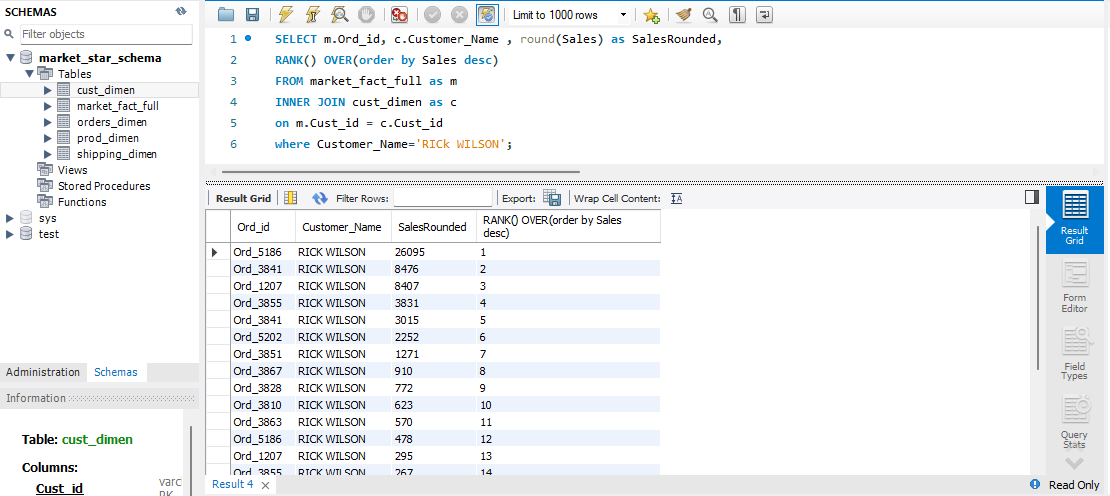

    SELECT m.Ord_id, c.Customer_Name , round(Sales) as SalesRounded, 
    RANK() OVER(order by Sales desc)
    FROM market_fact_full as m 
    INNER JOIN cust_dimen as c 
    on m.Cust_id = c.Cust_id 
    where Customer_Name='RICk WILSON';
    
### WITH clause
**Example3:** Top 10 sales order from a customer

    WITH sales_info AS (
    SELECT m.Ord_id, c.Customer_Name , 
    round(Sales) as SalesRounded, 
    RANK() OVER(order by Sales desc) as sales_rank
    FROM market_fact_full as m 
    INNER JOIN cust_dimen as c 
    on m.Cust_id = c.Cust_id 
    where Customer_Name='RICk WILSON') 
    select * 
    from sales_info 
    where sales_rank<=10;

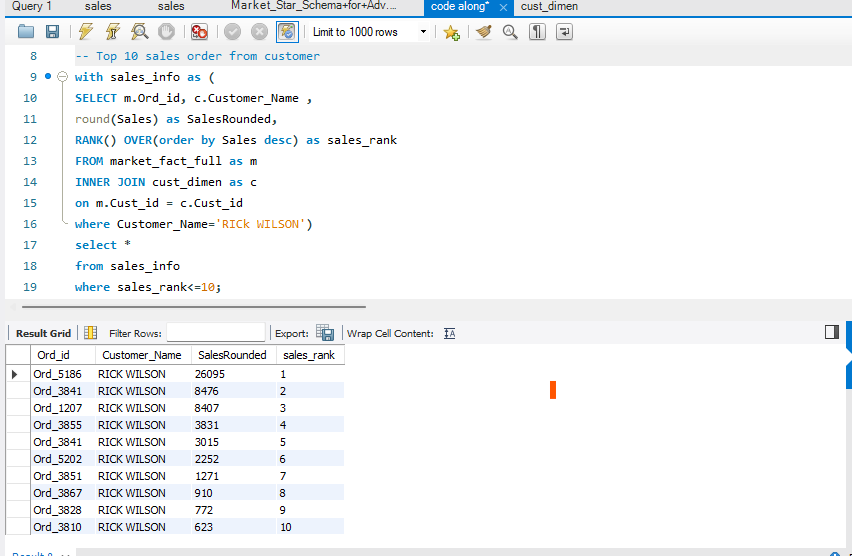

**Question :**

Given a table named products with the following columns.

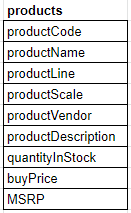


Write a query to retrieve the ranks of the products in decreasing order of their quantities in stock.


Sample Output

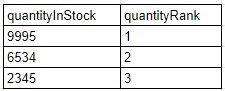

    select quantityInStock, rank() over ( order by quantityInStock desc ) as quantityRank from products ;

### DENSE_RANK(): 

    DENSE_RANK() OVER (
    
      PARTITION BY <expression>[{,<expression>...}]
    
      ORDER BY <expression> [ASC|DESC], [{,<expression>...}]
    
    )


### Rank vs Dense Rank 
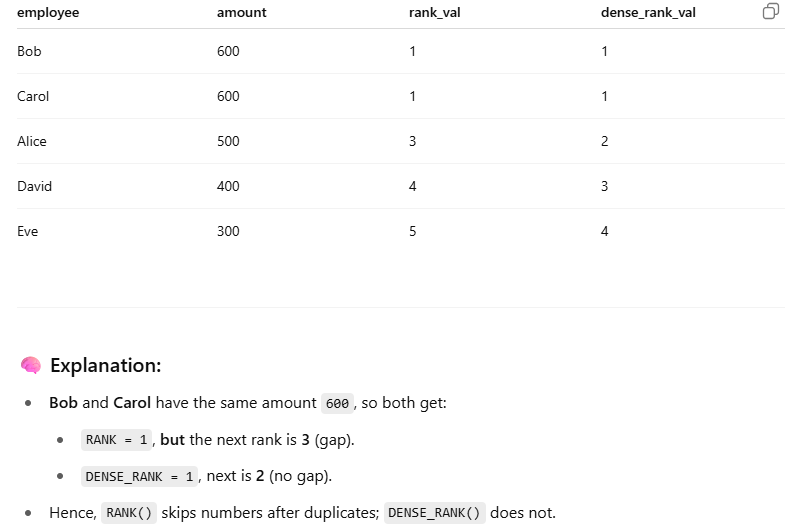

    SELECT
      employee,
      amount,
      RANK() OVER (ORDER BY amount DESC) AS rank_val,
      DENSE_RANK() OVER (ORDER BY amount DESC) AS dense_rank_val
    FROM sales;

### PERCENT_RANK(): 

Percentage rank value, which always lies between 0 and 1


PERCENT_RANK() calculates the relative rank of a row as a percentage of the total number of rows. The formula is:

    PERCENT_RANK = (RANK - 1) / (total_rows - 1)
    
    
* The **top-ranked** row gets **0.0**
* The **last row** gets **1.0**
  



> PERCENT_RANK() OVER (
> 
>PARTITION BY <expression>[{,<expression>...}]
> 
>ORDER BY <expression> [ASC|DESC], [{,<expression>...}])
>


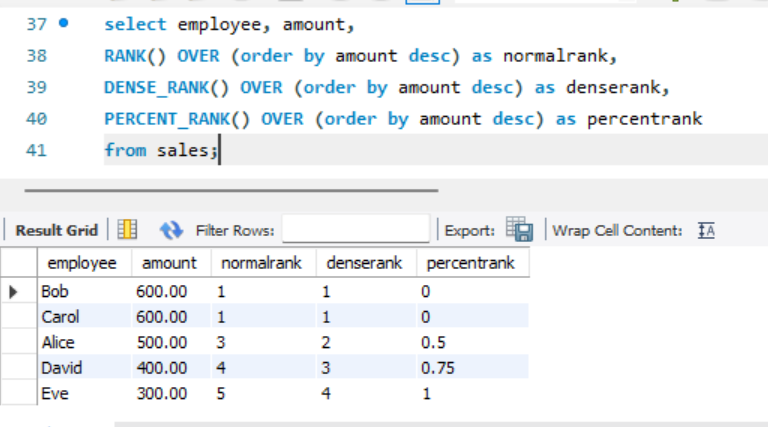

-- Top 10 sales order from customer by rank , deep rank, percent rank

-- Step 1: Create the table

    CREATE TABLE sales (
        id INT PRIMARY KEY,
        employee VARCHAR(50),
        amount DECIMAL(10, 2)
    );

-- Step 2: Insert the data

    INSERT INTO sales (id, employee, amount) VALUES
    (1, 'Alice', 500),
    (2, 'Bob', 600),
    (3, 'Carol', 600),
    (4, 'David', 400),
    (5, 'Eve', 300);

    select employee, amount, 
    RANK() OVER (order by amount desc) as normalrank,
    DENSE_RANK() OVER (order by amount desc) as denserank,
    PERCENT_RANK() OVER (order by amount desc) as percentrank
    from sales;

### ROW_NUMBER()

https://www.mysqltutorial.org/mysql-window-functions/mysql-row_number-function/


**Q:** Rank each sale within each department by the highest amount.

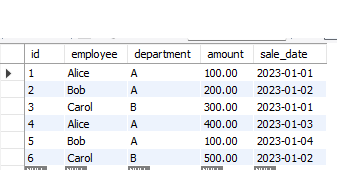

    SELECT
      employee,
      department,
      amount,
      ROW_NUMBER() OVER(PARTITION BY department ORDER BY amount DESC) AS row_num
    FROM sales;

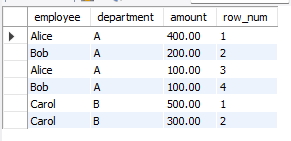

**Example-3:**

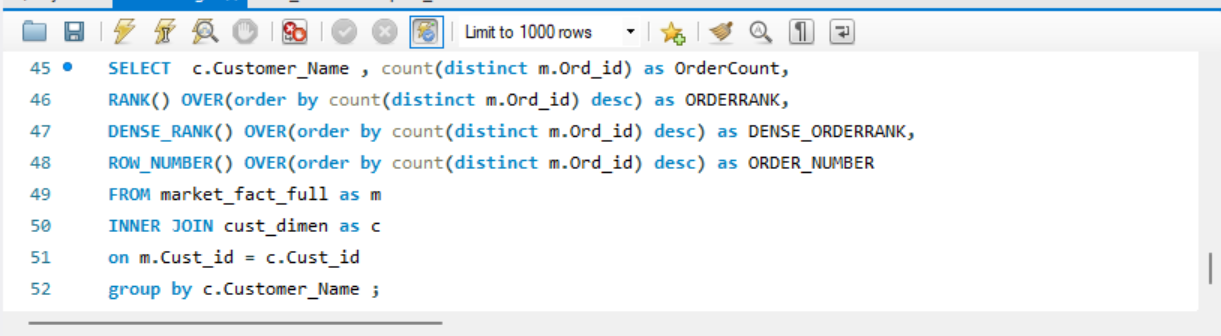

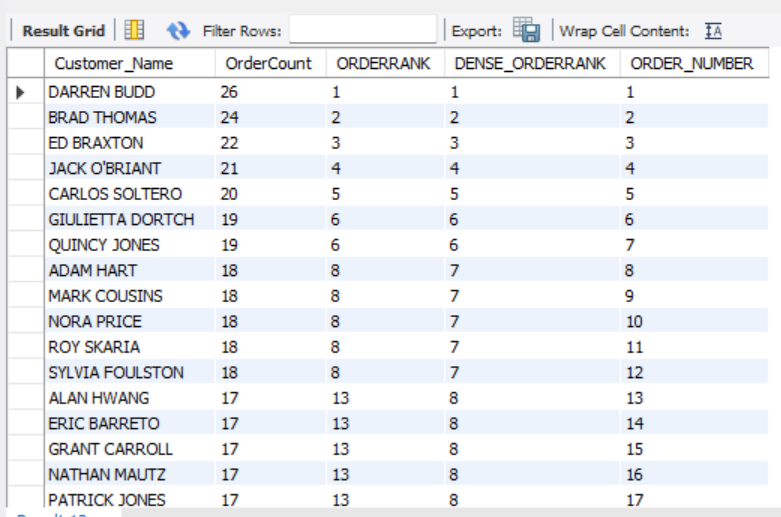

### Rank vs Rank + Partition

rank:

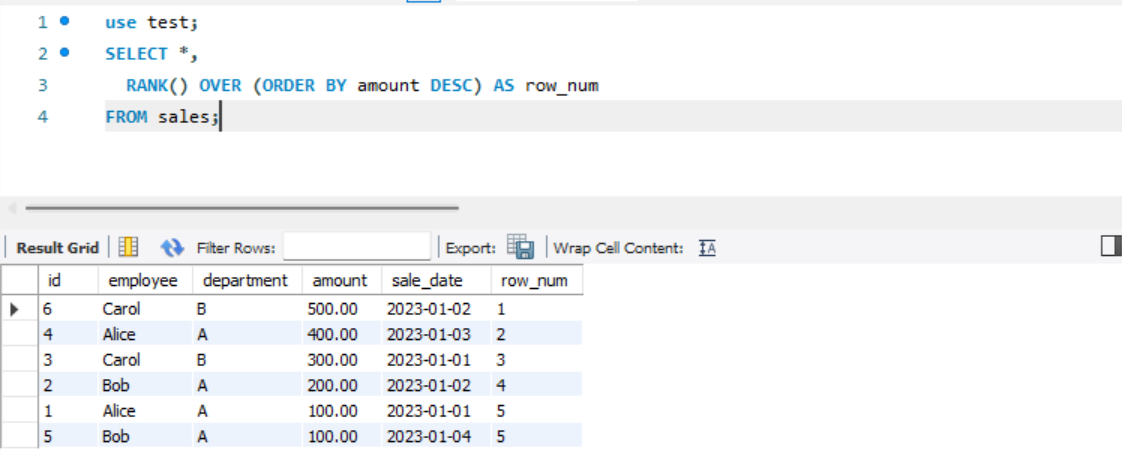

with partition

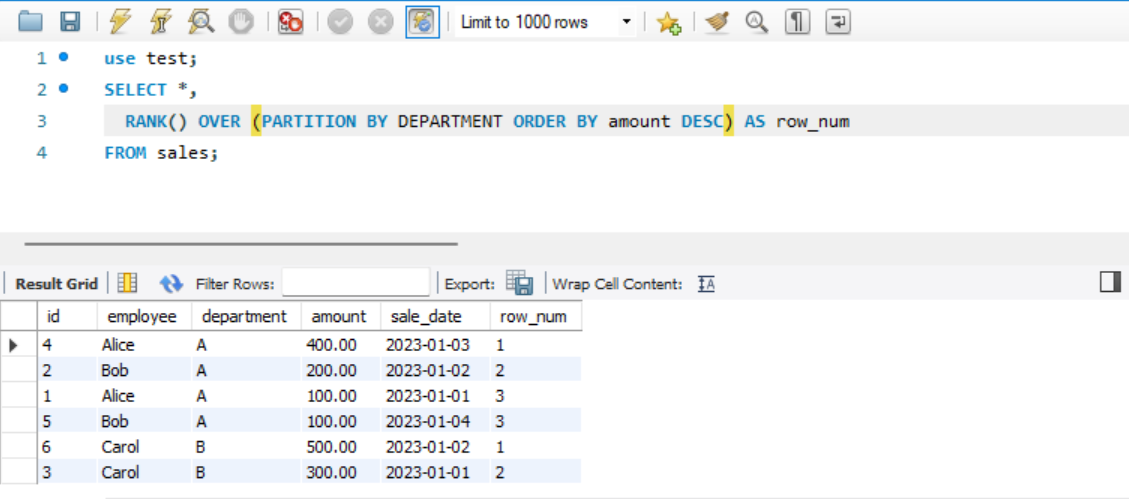


### Partitioning

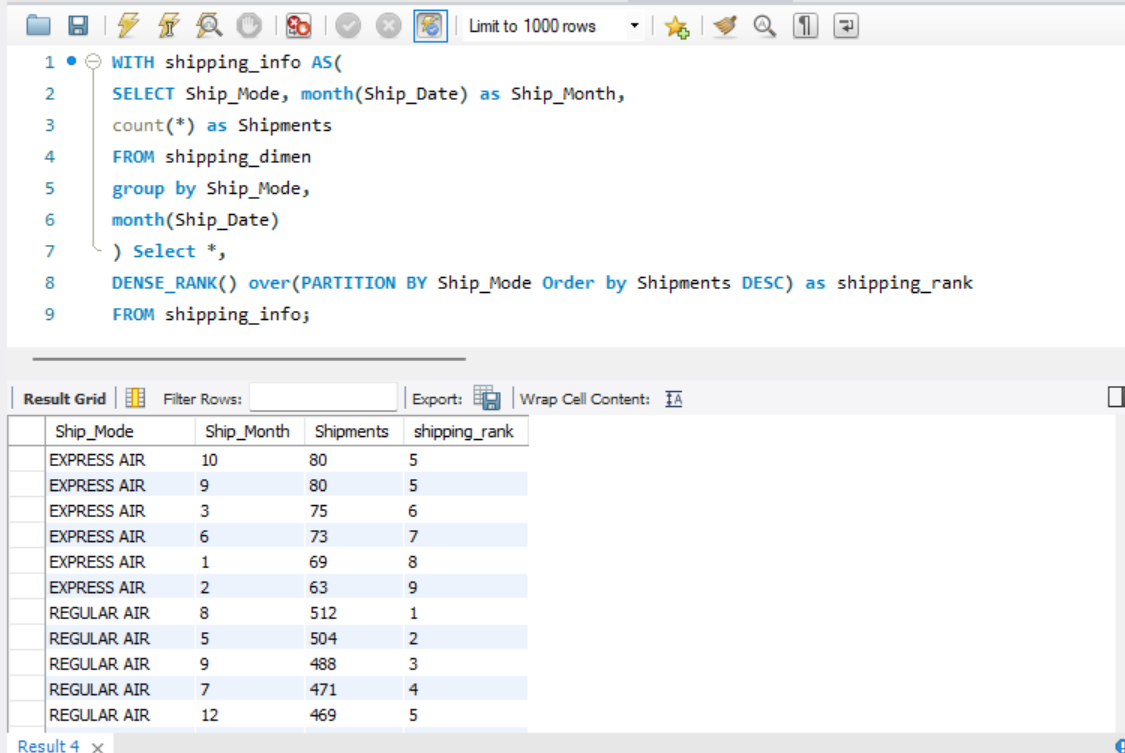



Given a table named orderdetails with the following columns



Orderdetails

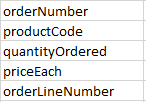

There are some orders that have multiple order amounts corresponding to the same order. Write a query to retrieve the individual and total order amounts for each order along with the order numbers. Order the values in the increasing order of the order numbers. For similar order numbers, arrange the individual order amounts in the decreasing order.


Expected Output

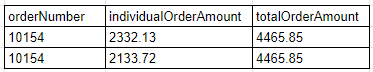





    select orderNumber, quantityOrdered * priceEach as individualOrderAmount,
    sum(quantityOrdered * priceEach) over (partition by orderNumber) as totalOrderAmount
    from orderdetails
    order by orderNumber, individualOrderAmount desc;


## Named Windows

here you saparate the clause after OVER placed in bracket (partition by orderNumber) as window 

like  WINDOW w AS (PARTITION BY orderNumber) ; and then use as RANK() over w


http://dev.mysql.com/doc/refman/8.0/en/window-functions-named-windows.html

The syntax for writing a named window is as follows:

    WINDOW window_name AS (window_spec)
    
      [, window_name AS (window_spec)] ...

The order in which the various SQL statements appear in a query is as follows: 

SELECT

FROM

JOIN

WHERE

GROUP BY

HAVING

WINDOW

ORDER 


Example:

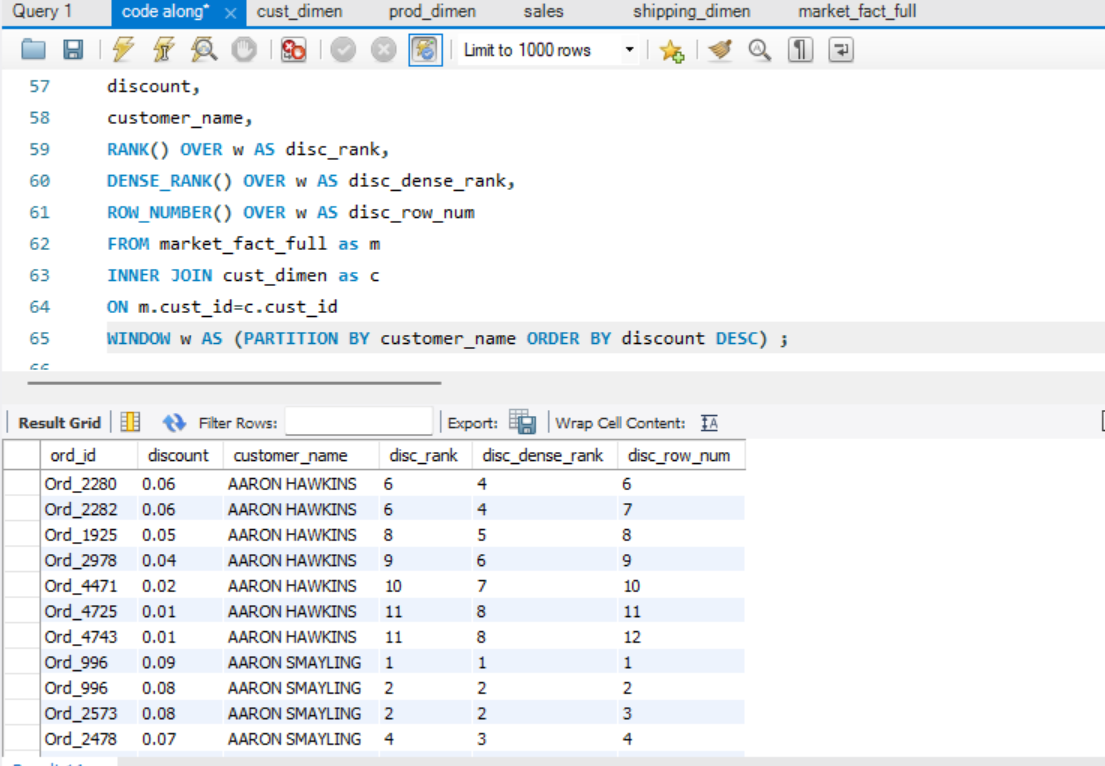

    SELECT ord_id,
    discount,
    customer_name,
    RANK() OVER w AS disc_rank,
    DENSE_RANK() OVER w AS disc_dense_rank,
    ROW_NUMBER() OVER w AS disc_row_num
    FROM market_fact_full as m
    INNER JOIN cust_dimen as c
    ON m.cust_id=c.cust_id
    WINDOW w AS (PARTITION BY customer_name ORDER BY discount DESC) ;

**Question:** Rewrite the following query using a named window:

    SELECT *,
    RANK() OVER (
      PARTITION BY ship_mode
      ORDER BY COUNT(*)) 'Rank',
    DENSE_RANK() OVER (
      PARTITION BY ship_mode
      ORDER BY COUNT(*)) 'Dense Rank',
    PERCENT_RANK() OVER (
      PARTITION BY ship_mode
      ORDER BY COUNT(*)) 'Percent Rank'
    FROM shipping_dimen;


Ans: 
**Step1:** above query is wrong as there is no group by when aggregration exists so first fix that for query to be able to run 

    SELECT  ship_mode,
    COUNT(*) AS ship_mode_count,
    RANK() OVER (PARTITION BY ship_mode ORDER BY COUNT(*))  AS 'Rank',
    DENSE_RANK() OVER (PARTITION BY ship_mode ORDER BY COUNT(*)) AS 'Dense Rank',
    PERCENT_RANK() OVER (PARTITION BY ship_mode ORDER BY COUNT(*)) AS 'Percent Rank'
    FROM shipping_dimen
    GROUP BY ship_mode;

**Step2:** The output is still vague 

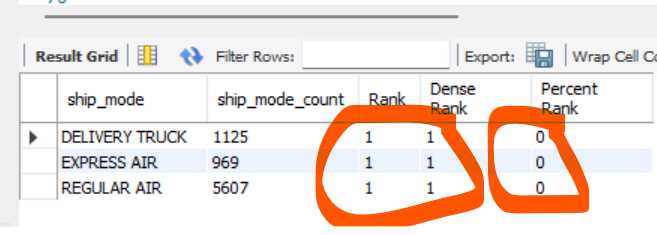

**Step3:** add named windows 

    SELECT  ship_mode,
    COUNT(*) AS ship_mode_count,
    RANK() OVER w AS 'Rank',
    DENSE_RANK() OVER w AS 'Dense Rank',
    PERCENT_RANK() OVER w AS 'Percent Rank'
    FROM shipping_dimen
    GROUP BY ship_mode
    WINDOW w AS (PARTITION BY ship_mode ORDER BY COUNT(*));


### Frames
http://dev.mysql.com/doc/refman/8.0/en/window-functions-named-windows.html

https://www.vertica.com/docs/9.2.x/HTML/Content/Authoring/SQLReferenceManual/Functions/Analytic/window_frame_clause.htm?origin_team=T02V9CHFH


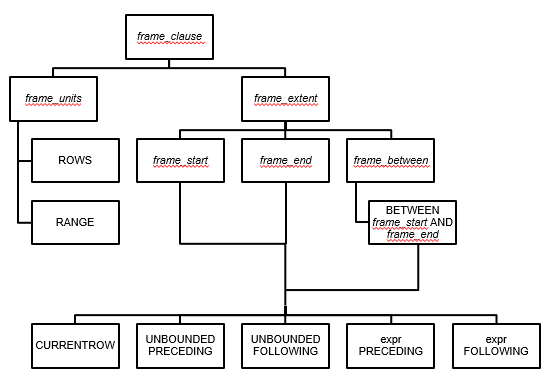

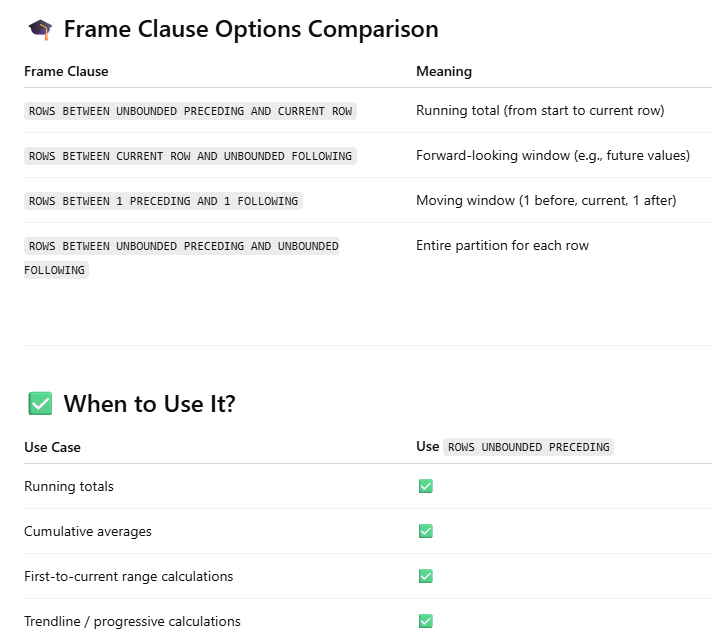

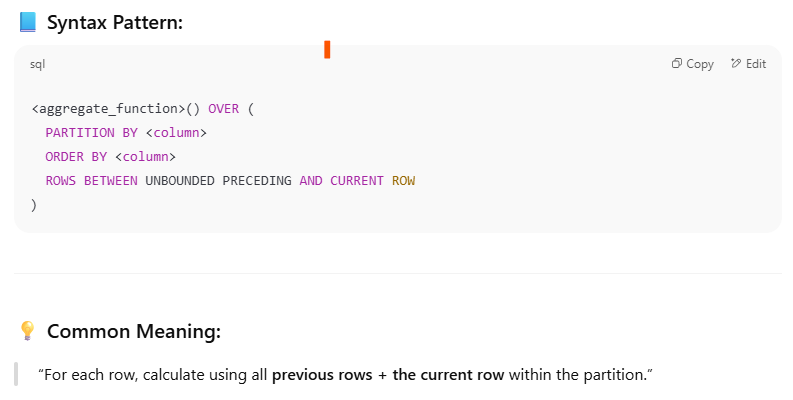

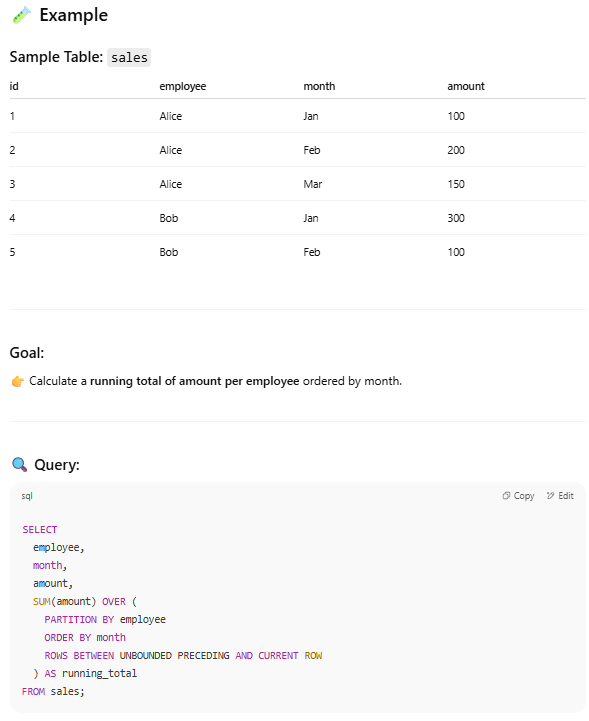

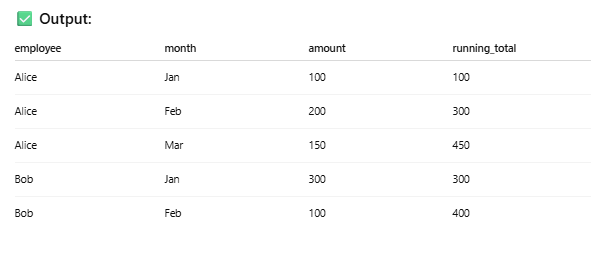


**Example:** give shiping amount total grouped by date and running total and moving avarage with 6 day freqyency

    WITH daily_shipping_summary AS (
    SELECT s.Ship_Date, SUM(m.shipping_cost) as daily_total
    FROM shipping_dimen as s 
    INNER JOIN market_fact_full as m
    ON s.Ship_id=m.Ship_id
    group by s.Ship_Date
    order by s.Ship_Date
    )
    SELECT *,
    SUM(daily_total) OVER w1 AS running_total,
    AVG(daily_total) OVER w1 AS moving_average
    From daily_shipping_summary
    WINDOW w1 as (order by ship_date ROWS UNBOUNDED PRECEDING),
    w2 as (order by ship_date ROWS 6 PRECEDING)
    ;

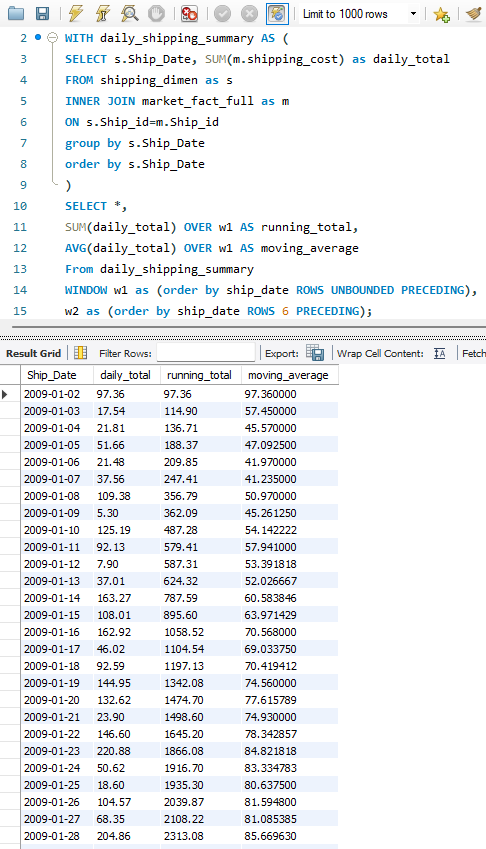


**Question:**

The table given below contains the number of runs scored by Virat Kohli over the time period 2008-2019. Add another column which displays the 5-year moving average of the number of runs scored.


**Table Name:** Kohli_Batting

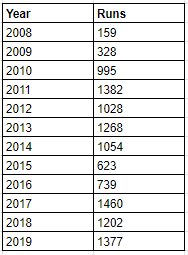
 
**Sample Output:**

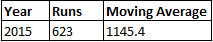

        select *, 
        avg(runs) over (order by year rows 4 preceding) as '5 Year Moving Average'
        from kohli_batting;

###  Lead and Lag Functions 

Identifying frequent customers is a commonly observed business requirement for retail chains. The 'lead' and 'lag' functions can be quite helpful in this case. You can compare the date on which a particular customer purchased an item from a store with the next date on which they ordered an item again. 

The syntax for using the 'lead' and 'lag' functions are as follows:



    LEAD(expr[, offset[, default]])
    
      OVER (Window_specification | Window_name)

    eg. **LEAD(column, offset, default_value) OVER (ORDER BY column)**

        * column: The column you want to retrieve data from
        * offset: The number of rows forward to look (default is 1)
        * default_value: The value to return if the offset goes beyond the result set

    
    LAG(expr[, offset[, default]])
            OVER (Window_specification | Window_name)


    eg. **LAG(column, offset, default_value) OVER (ORDER BY column)**

        * column: The column you want to retrieve data from
        * offset: The number of rows backward to look (default is 1)
        * default_value: The value to return if the offset goes beyond the result set


Example: Let's say we have a table of monthly sales:
**Lead**

    CREATE TABLE monthly_sales (
        month DATE,
        sales INT
    );
    
    INSERT INTO monthly_sales VALUES
    ('2023-01-01', 1000),
    ('2023-02-01', 1200),
    ('2023-03-01', 900),
    ('2023-04-01', 1500);
    
    SELECT 
        month,
        sales,
        LEAD(sales, 1, 0) OVER (ORDER BY month) AS next_month_sales
    FROM monthly_sales;


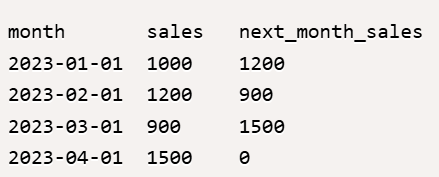

**LAG:**
The LAG function is similar to LEAD, but it accesses data from previous rows in the result set. It's useful for comparing a row's value with the value in the preceding row(s).


    SELECT 
        month,
        sales,
        LAG(sales, 1, 0) OVER (ORDER BY month) AS previous_month_sales,
        sales - LAG(sales, 1, 0) OVER (ORDER BY month) AS sales_difference
    FROM monthly_sales;

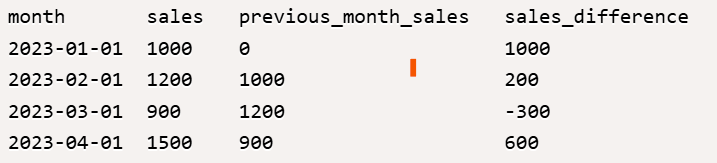

    **Example:**

          -- lead Lag
        
         With order_info as (
        	Select c.Customer_Name,
        	 m.Ord_id, 
        	 o.order_date
        	From
        		market_fact_full as m
        		LEFT JOIN orders_dimen as o on m.Ord_id=o.Ord_id 
        		LEFT JOIN cust_dimen as c on m.Cust_id = c.Cust_id 
        	WHERE 
        		c.Customer_Name = 'RICK WILSON'
        	Group By 
        		c.Customer_Name,
        		m.Ord_id, 
        		o.order_date
                )
         Select 
        	*,
        	lead(order_date,1,0) OVER (order by order_date, Ord_id) As NextOrder_Date,
        	DATEDIFF(lead(order_date,1,0) OVER (order by order_date, Ord_id),order_date) as days_diff
         From 
        	order_info;
        ; 
        
        -- alternate sql 
        
        WITH order_info AS (
            SELECT 
                c.Customer_Name,  
                m.Ord_id,   
                o.order_date  
            FROM  
                market_fact_full AS m  
                LEFT JOIN orders_dimen AS o ON m.Ord_id = o.Ord_id   
                LEFT JOIN cust_dimen AS c ON m.Cust_id = c.Cust_id  
            WHERE 
                c.Customer_Name = 'RICK WILSON'
        ),
        order_with_lead AS (
            SELECT 
                *,  
                LEAD(order_date, 1) OVER (ORDER BY order_date, Ord_id) AS NextOrder_Date
            FROM 
                order_info
        )
        SELECT 
            *,  
            DATEDIFF(NextOrder_Date, order_date) AS days_diff
        FROM 
            order_with_lead;

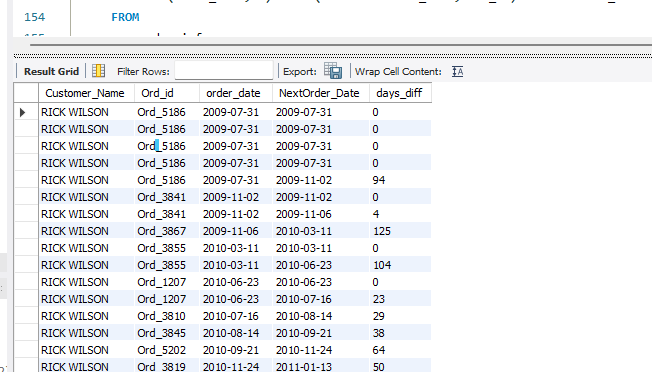


### CASE STATEMENT


WHEN condition1 THEN result1

  WHEN condition2 THEN result2

  .

  .

  WHEN conditionN THEN resultN

  ELSE result

END AS column_name;

**Example:**
    
    SELECT 
    	market_fact_id,
    	profit,
    	CASE
    		WHEN profit <-500 THEN 'Huge Loss'
    		WHEN profit BETWEEN -500 AND 0 THEN 'Bearable Loss'
    		WHEN profit BETWEEN 0 AND 500 THEN 'Decent Profit'
    		ELSE 'Great Profit'
    	END AS Profit_type
    FROM
    	market_fact_full

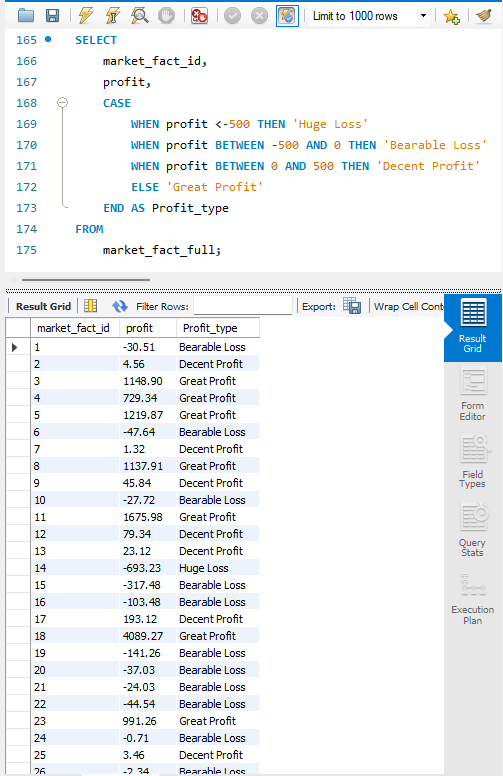

**Example**

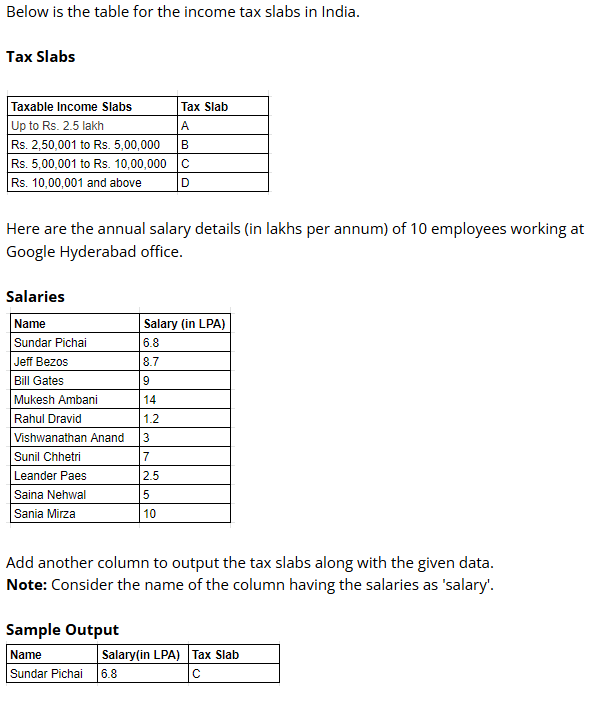

    select *,
        (case
            when salary <= 2.5 THEN 'A'
            WHEN salary  > 2.5 AND salary <= 5 THEN 'B'
            WHEN salary > 5 AND salary <=10 THEN 'C'
            when salary > 10 then 'D'
        END) AS 'Tax Slab'
    FROM salaries;